<a href="https://colab.research.google.com/github/acb100cias/BioMateFC/blob/master/HH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [ ]:
uc=0.25
def f(u):
  return u*(1-u)*(u-uc)

In [ ]:
f(23)

In [ ]:
U=np.arange(-0.2,1.1,0.01)

In [ ]:
FU=f(U)

In [ ]:
FU


In [ ]:
plt.plot(U,FU)
plt.scatter([0,uc,1],[0,f(uc),f(1)],color='red')

In [ ]:
plt.plot(U,FU)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
for v in np.arange(-0.09,0.13,0.032):
  plt.plot(U,FU-v)


In [ ]:
epsilon=0.1
k=1
def G(X,t):
  u,v=X
  return np.array([(u*(1-u)*(u-uc)-v),epsilon*(k*u-v)])


In [ ]:
T=np.linspace(-1,100,3000)

In [ ]:
sol=integrate.odeint(G,[0,-0.2],T)

In [ ]:
plt.plot(T,sol.T[0])
plt.plot(T,sol.T[1])


In [ ]:
plt.plot(sol.T[0],sol.T[1])

In [ ]:
for j in np.arange(0,1,0.01):
  plt.plot(integrate.odeint(G,[j,-0.2],T).T[0],integrate.odeint(G,[j,-0.2],T).T[1])



In [39]:
tmin=0
tmax=50
gk=36
gNa=120
gL=0.3
Cm=1.
Vk=-12.
VNa=115.
VL=10.61
T1=np.linspace(tmin,tmax,100000)



In [50]:
def alpha_n(Vm):
  return (0.01*(10.-Vm)/(np.exp(1.-0.1*Vm)-1.))
def beta_n(Vm):
  return 0.125*np.exp(-Vm/80.)
def alpha_m(Vm):
  return 0.1*(25.-Vm)/(np.exp(2.5-(0.1*Vm))-1)
def beta_m(Vm):
  return 4.*np.exp(-Vm/18.)
def alpha_h(Vm):
  return (0.07*(np.exp(-Vm)/(20.)))
def beta_h(Vm):
  return 1/np.exp(3.-(0.1*Vm))+1

In [51]:
def n_inf(Vm):
  return alpha_n(Vm)/(alpha_n(Vm)+beta_n(Vm))
def m_inf(Vm):
  return alpha_m(Vm)/(alpha_m(Vm)+beta_m(Vm))
def h_inf(Vm):
  return alpha_h(Vm)/(alpha_h(Vm)+beta_h(Vm))

In [52]:
def Id(t):
  if 0.0 < t < 1.:
    return 150.
  elif 10.<t<11.:
    return 50.
  else:
    return 0.

In [53]:
def CalcDeriv(y,t0):
  dy=np.zeros((4,))
  Vm=y[0]
  n=y[1]
  m=y[2]
  h=y[3]
  GK=(gk/Cm)*np.power(n,4)
  GNa=(gNa/Cm)*np.power(m,3)*h
  GL=(gL/Cm)
  dy[0]=(-GK-GNa-GL+Id(t0))/Cm
  dy[1]=alpha_n(Vm)*(1.-n)-beta_n(Vm)*n
  dy[2]=alpha_m(Vm)*(1.-m)-beta_m(Vm)*m
  dy[3]=alpha_h(Vm)*(1.-h)-beta_h(Vm)*h
  return dy

In [54]:
Y=np.array([0.001,n_inf(0.001),m_inf(0.001),h_inf(0.001)])
#Vy=(Vm[t0,tmax],n[t0:tmax],m[t0:tmax],h[t0:tmax])
Vy=integrate.odeint(CalcDeriv,Y,T1)

In [55]:
Sol1=Vy.T

NameError: name 'T' is not defined

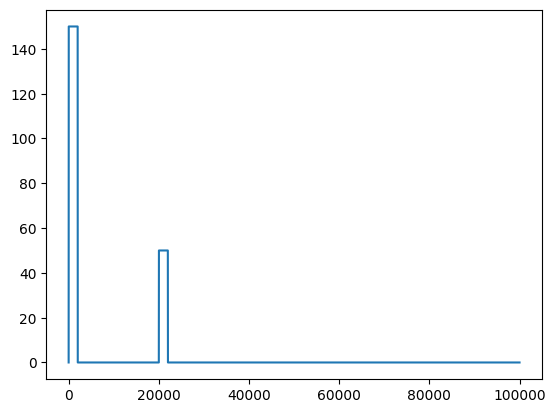

In [56]:
Idv=[Id(t)for t in T1]
plt.plot(Idv)

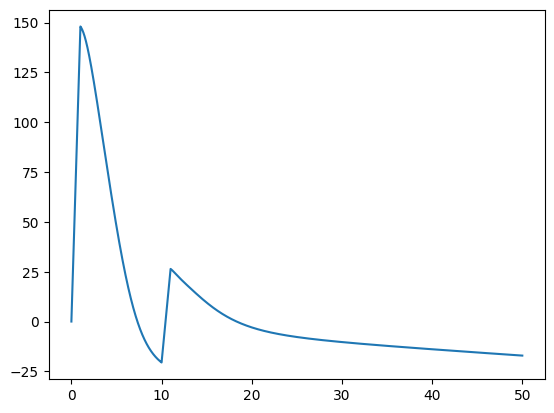

In [58]:
plt.plot(T1,Sol1[0])


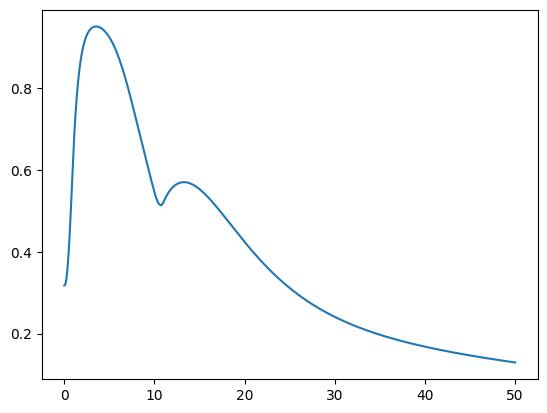

In [60]:
plt.plot(T1,Sol1[1])


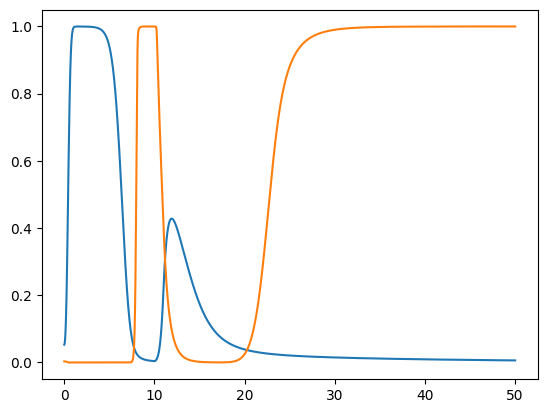

In [61]:
plt.plot(T1,Sol1[2])
plt.plot(T1,Sol1[3])

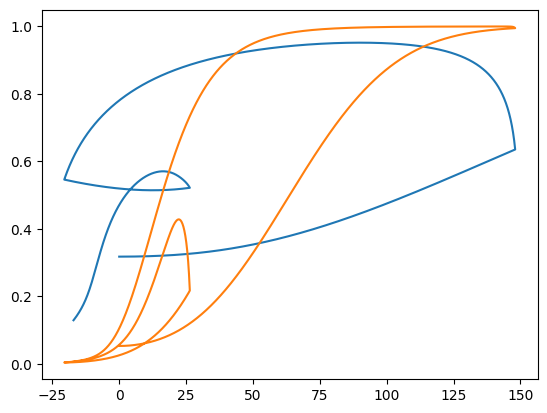

In [64]:
plt.plot(Sol1[0],Sol1[1])
plt.plot(Sol1[0],Sol1[2])

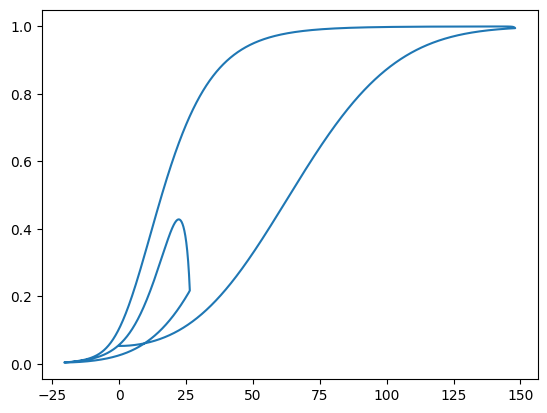

In [63]:
plt.plot(Sol1[0],Sol1[2])